In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#statmodels & patsy
import patsy
import statsmodels.api as sm

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# sm OLS model

In [3]:
np.random.seed(21)

corr = 0.75
covs = [[1,corr],[corr,1]]
means = [0,0]

data = np.random.multivariate_normal(means,covs,1000)

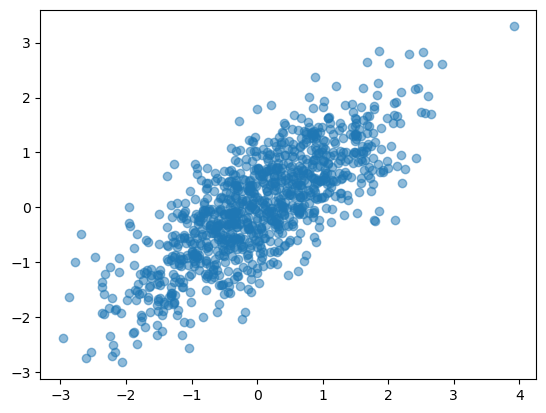

In [5]:
plt.scatter(data[:,0],data[:,1],alpha=0.5);

In [6]:
df = pd.DataFrame(data,columns=['d1','d2'])

In [7]:
df.head()

,d1,d2
0,0.087922,0.009294
1,-0.530187,-1.418836
2,-0.092297,-1.302195
3,0.275502,0.109635
4,-1.050818,-1.059746


In [8]:
df.corr()

,d1,d2
d1,1.000000,0.773245
d2,0.773245,1.000000


In [9]:
outcome,predictors = patsy.dmatrices('d2 ~ d1',df)

In [10]:
model = sm.OLS(outcome,predictors)

In [11]:
type(model)

statsmodels.regression.linear_model.OLS

In [12]:
results = model.fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     d2   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1484.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          1.18e-199
Time:                        15:17:15   Log-Likelihood:                -953.74
No. Observations:                1000   AIC:                             1911.
Df Residuals:                     998   BIC:                             1921.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0116      0.020     -0.582      0.5

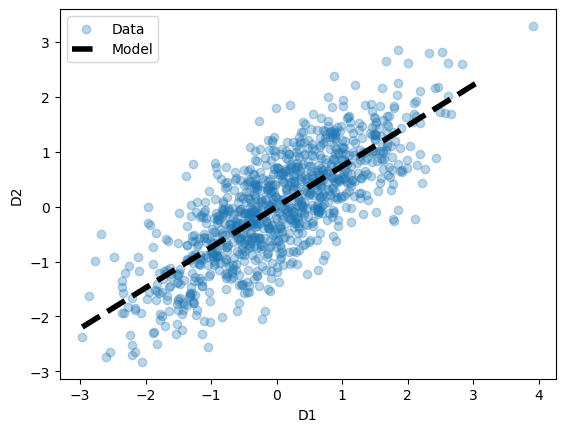

In [14]:
plt.scatter(df['d1'],df['d2'],alpha=0.3,label='Data');

xs = np.arange(df['d1'].min(),df['d1'].max())
ys = 0.7396 * xs #coef
plt.plot(xs,ys,'--k',linewidth=4,label='Model')

plt.xlabel('D1')
plt.ylabel('D2')
plt.legend();

In [15]:
df['d3'] = pd.DataFrame(np.random.randn(1000),index=df.index)
df.head()

,d1,d2,d3
0,0.087922,0.009294,-1.611758
1,-0.530187,-1.418836,1.933703
2,-0.092297,-1.302195,0.334072
3,0.275502,0.109635,-0.124464
4,-1.050818,-1.059746,0.278050


In [17]:
outcome, predictors = patsy.dmatrices('d1 ~ d2 + d3', df)
model = sm.OLS(outcome,predictors)
resutls = model.fit()

In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     d2   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1484.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          1.18e-199
Time:                        15:22:10   Log-Likelihood:                -953.74
No. Observations:                1000   AIC:                             1911.
Df Residuals:                     998   BIC:                             1921.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0116      0.020     -0.582      0.5

# sklearn linear model

In [20]:
from sklearn import linear_model

In [21]:
# Convert data into arrays for easier use with sklearn
d1 = np.reshape(df.d1.values, [len(df.d1), 1])
d2 = np.reshape(df.d2.values, [len(df.d2), 1])
d3 = np.reshape(df.d3.values, [len(df.d3), 1])

In [22]:
reg = linear_model.LinearRegression()

In [23]:
reg.fit(d2,d1)

LinearRegression()

In [24]:
# Check the results of this
#  If you compare these to what we got with statsmodels above, they are indeed the same
print('The intercept value is: \t{:1.4f}'.format(reg.intercept_[0]))
print('The coefficient value is: \t{:1.4f}'.format(reg.coef_[0][0]))

The intercept value is: 	0.0164
The coefficient value is: 	0.8084


In [25]:
reg = linear_model.LinearRegression()
reg.fit(np.hstack([d2, d3]), d1)

LinearRegression()

In [26]:
# Check the results of this
#  If you compare these to what we got with statsmodels above, they are indeed the same
print('Intercept: \t {:+1.4f}'.format(reg.intercept_[0]))
print('d2 value:\t {:+1.4f}'.format(reg.coef_[0][0]))
print('d2 value:\t {:+1.4f}'.format(reg.coef_[0][1]))

Intercept: 	 +0.0179
d2 value:	 +0.8070
d2 value:	 -0.0368


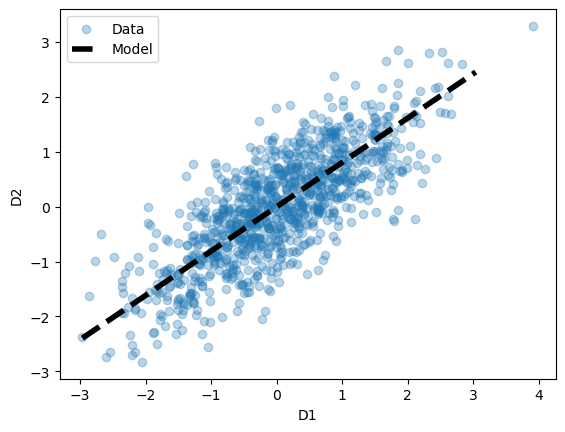

In [27]:
plt.scatter(df['d1'],df['d2'],alpha=0.3,label='Data');

xs = np.arange(df['d1'].min(),df['d1'].max())
ys = 0.8084 * xs #coef
plt.plot(xs,ys,'--k',linewidth=4,label='Model')

plt.xlabel('D1')
plt.ylabel('D2')
plt.legend();